In [1]:
!pip install matplotlib

In [2]:
!pip install mesa==2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 721.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.5/264.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30

In [3]:
from mesa import Agent, Model, time
from mesa.space import MultiGrid
import random
import matplotlib.pyplot as plt

In [4]:
# Définir un agent Trader
class Trader(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 100

    def step(self):
        # Simuler une nouvelle du marché (aléatoire)
        market_condition = random.choice(["hausse", "baisse", "stable"])

        # Prendre une décision basée sur la condition du marché
        if market_condition == "hausse" and self.wealth > 20:
            print(f"Agent {self.unique_id} décide d'acheter.")
            self.wealth -= 10  # Acheter
        elif market_condition == "baisse" and self.wealth < 150:
            print(f"Agent {self.unique_id} décide de vendre.")
            self.wealth += 10  # Vendre
        else:
            print(f"Agent {self.unique_id} décide de ne rien faire.")

# Définir le modèle de marché
class MarketModel(Model):
    def __init__(self, N):
        self.num_agents = N
        self.grid = MultiGrid(10, 10, True)
        self.schedule = time.RandomActivation(self)
        for i in range(self.num_agents):
            trader = Trader(i, self)
            self.schedule.add(trader)
            x = random.randrange(self.grid.width)
            y = random.randrange(self.grid.height)
            self.grid.place_agent(trader, (x, y))

    def step(self):
        self.schedule.step()


--- Step 1 ---
Agent 9 décide de vendre.
Agent 5 décide d'acheter.
Agent 7 décide de ne rien faire.
Agent 3 décide de vendre.
Agent 2 décide de vendre.
Agent 8 décide de vendre.
Agent 4 décide de vendre.
Agent 0 décide de vendre.
Agent 1 décide d'acheter.
Agent 6 décide de ne rien faire.

--- Step 2 ---
Agent 1 décide de ne rien faire.
Agent 4 décide de vendre.
Agent 5 décide de vendre.
Agent 2 décide d'acheter.
Agent 8 décide d'acheter.
Agent 6 décide de ne rien faire.
Agent 3 décide d'acheter.
Agent 9 décide de ne rien faire.
Agent 7 décide d'acheter.
Agent 0 décide de ne rien faire.


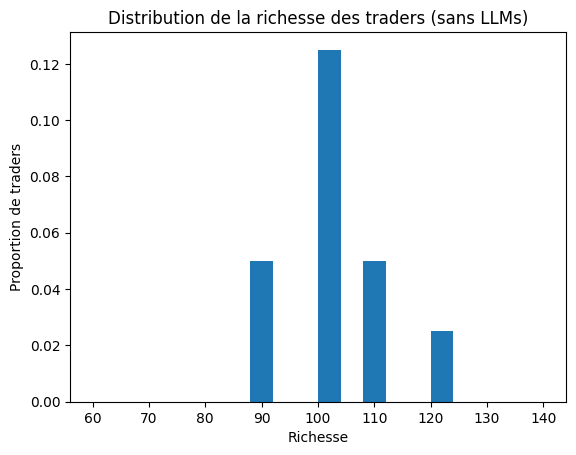

In [7]:
# Simulation sans LLMs
market_model = MarketModel(10)
for i in range(2):
    print(f"\n--- Step {i+1} ---")
    market_model.step()

# Visualisation des résultats
wealth_values = [agent.wealth for agent in market_model.schedule.agents]
plt.hist(wealth_values, bins=20, range=(60, 140), density=True)
plt.title("Distribution de la richesse des traders (sans LLMs)")
plt.xlabel("Richesse")
plt.ylabel("Proportion de traders")
plt.show()